<a href="https://colab.research.google.com/github/Akash-Rawat/Fashion2021/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **fashionMNIST - Image Classification using Artificial Neural Networks**

**Importing required libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


**Loading the fashionMNIST dataset.**

Here the data imported is in the form of four arrays.

train-images-idx1-ubyte.gz - Training labels

train-images-idx3-ubyte.gz - Training images

t10k-labels-idx1-ubyte.gz - Test labels

t10k-images-idx3-ubyte.gz - Test images

Here, The train_images and train_labels arrays will be used as the training set for our ANN model.Further, the model is tested against the test set, the test_images, and test_labels arrays.
The images in the dataset are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.Here, every integer digit represents separatate class of clothing. 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


*Each image is mapped to a single label. Here, since the class names are not included with the dataset, we defined and stored them here to use later when plotting the images:*

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## **Exploring the dataset**

*There are 60,000 images in the training set,
with each image represented as 28 x 28 pixels:*

In [ ]:
train_images.shape

(60000, 28, 28)

*There are 60,000 labels in the training set*

In [ ]:
len(train_labels)

60000

*As per the output below, we can see that label is an integer between 0 and 9, where each integer represents separate category of clotihng*

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

*In cae of test set, there are 10,000 images in test set. Again, each image is representes as 28*28 pixels:*

In [6]:
 print(test_images.shape)
 len(test_images)

(10000, 28, 28)


10000

## **Data Preprocessing**

*We must preprocess the data before feeding it to the model. At this moment, we can observe that image pixel value falls in the range of 0 to 255. Hence, we have to scale these images so before feeding it to model. Hence, reducing computation time for the model.*

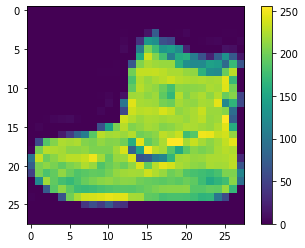

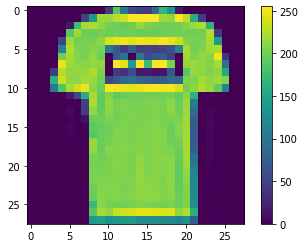

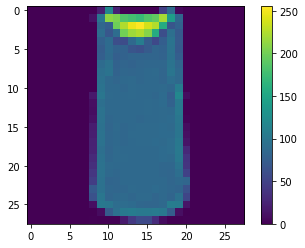

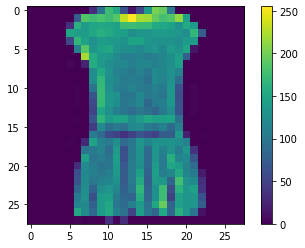

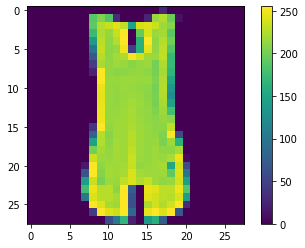

In [7]:
for i in range(5):
  plt.figure()
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

*Scaling the images, on the scale of 0 to 1.*

In [8]:
train_images=train_images/255.0
test_images=test_images/255.0

*Now let's review few image samples to check wether images are in desired format.*

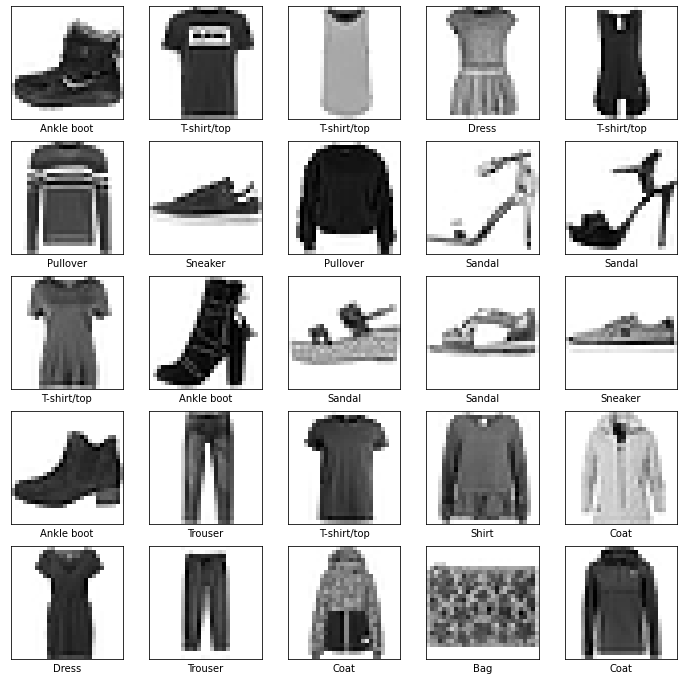

In [9]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Importing and using Callbacks**

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [93]:
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=7)
filepath = "modelTwo.h5"
ckpt = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
rlp = ReduceLROnPlateau(monitor='accuracy', patience=3, verbose=1)

## **Building the model**

*First layer used was flatten, it transforms the format of images from two-dimensional array (here 28*28 pixels) to a one-dimenional array(of 28*28=784 pixels)*

*This layer has no parameters to learn, it role is to reformat input data*

*Further, our network has two dense layers.First layer has 128 nodes and second layer has 10, i.e, it will return a logits array of length 10.*

*Finally, an activation layer, "Softmax". It is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That means, it will predict the probability for all outcomes, here in our case, for labels(1 to 10), and then we will check which outcome has maximum probability(by using argmax) and print it as our prediction*

In [90]:
#defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation("softmax")
])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


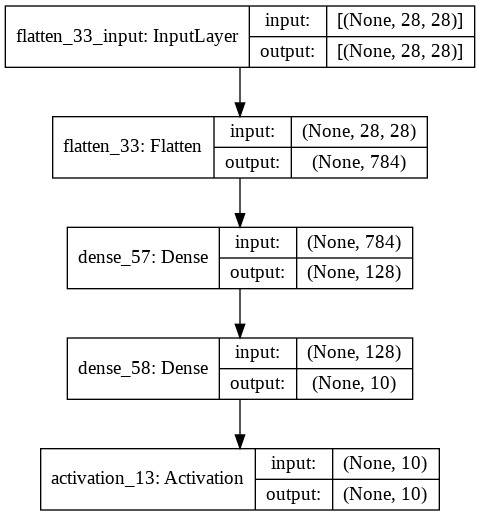

In [91]:
model.summary()
plot_model(model, show_shapes=True) 

## **Compilation of the model**

* *Loss Function - role of a loss function is to measure the accuracy of model while training. Decrease in the loss function means the increase in the performace of the model.*

* *Optimizer - Here, we used 'adam' as optimizer, as it is one of the best among adpative optimizers*

* *Metrics - It is simply used to monitor training and test steps. Here, we used "accuracy" as metrics parameter.Here, accuracy defined as the fraction of the images that are correctky classified.*

In [95]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

*Feeding the model*

In [97]:
model.fit(train_images, train_labels,callbacks=[es, ckpt, rlp], epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4945 - accuracy: 0.8254

Epoch 00001: accuracy improved from -inf to 0.82538, saving model to modelTwo.h5
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8653

Epoch 00002: accuracy improved from 0.82538 to 0.86527, saving model to modelTwo.h5
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3372 - accuracy: 0.8751

Epoch 00003: accuracy improved from 0.86527 to 0.87505, saving model to modelTwo.h5
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8824

Epoch 00004: accuracy improved from 0.87505 to 0.88235, saving model to modelTwo.h5
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8903

Epoch 00005: accuracy improved from 0.88235 to 0.89028, saving model to modelTwo.h5
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2

**Evaluationg accuracy on test data**

*Here, we found that accuracy on test data is little less than with respect accuracy on training data. This gap between accuracy represents overfitting.*

*Overfitting represents the condition when model does not performs with same accuracy on test data(never before seen data) as comapred with its performance on training data.*

*However, 100% accuracy also points toward bad model, since at present, it is impossible to predict future with 100% accuracy.*

In [98]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3632 - accuracy: 0.8863

Test accuracy: 0.8863000273704529


**Making predictions**

In [43]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [99]:
predictions = probability_model.predict(test_images)

*Below, prediciton is in the form of array of 10 numbers. Here, each number indicates the confidence of the model corresponding to different clothings.*

*Now, we can see that which label has highest confidence value. In this case its, '9'*

In [100]:
predictions[0]

array([1.1702008e-04, 7.2635172e-05, 1.2770781e-04, 1.4866039e-04,
       6.2154228e-05, 3.0767256e-03, 2.0824213e-04, 1.1371907e-02,
       6.4105907e-04, 9.8417389e-01], dtype=float32)

*we used function 'argmax' to compute maximum predicted value.*

In [101]:
np.argmax(predictions[0])

9

*o, our model is most confident that this image is an ankle boot, or class_names[9]. Further examining the test label shows that this classification is correct:*

In [102]:
test_labels[0]

9

*We can view all above scenario of prediciton done by model for 'ankle boot' in the form of graph.*

In [103]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [104]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

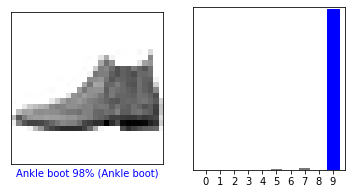

In [105]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

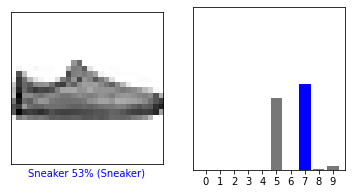

In [107]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

*Plotting the first X test images, their predicted labels, and the true labels.*
*Color correct predictions in blue and incorrect predictions in red.*

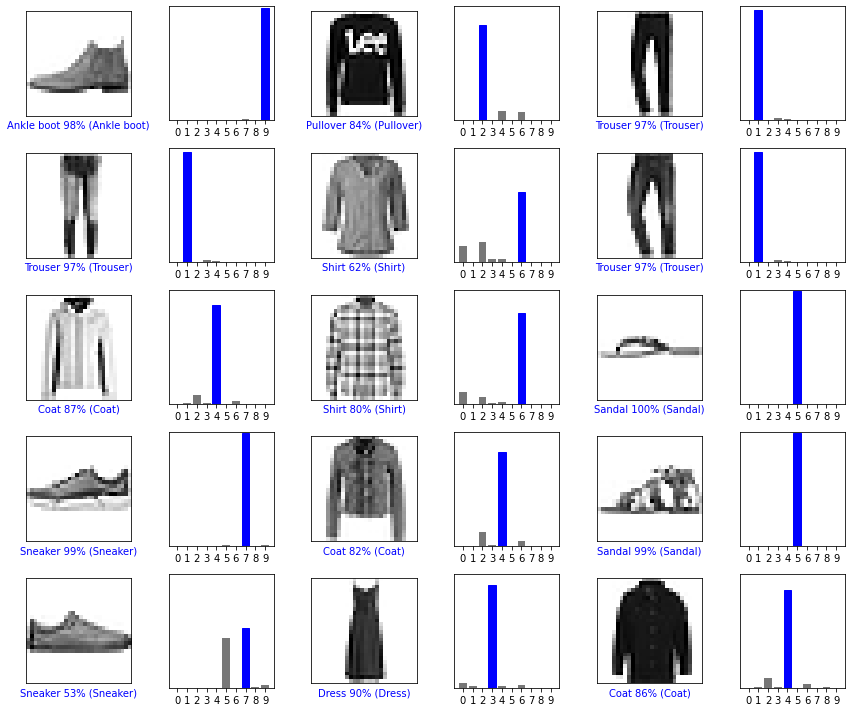

In [106]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()